# Assignment 4: Airline
## Scenario: 
### Airline frequent traveler programs are a highly valuable asset - some analysts estimate that they are worth more than the traditional air travel part of the business. During the 2020-21 Coronavirus pandemic when air travel collapsed, some airlines survived by being able to borrow money against their loyalty programs. The file EastWestAirlinesCluster.csv contains information on 3999 passengers who belong to an airline's frequent flier program. For each passenger, the data include information on their mileage history and on different ways they accrued or spent miles in the past year. The airline wants to (1) segment its customers into three distinct segments for marketing purposes, and (2) be able to predict which segment new customers belong to.

## Question 1: 
### Using all the data, apply k-means clustering to cluster the data into 3 segments. Describe the distinct features of the segments. Add to each customer record an indicator for which cluster they belong to. 

### We start by importing our relevant libraries in Python as well as the dataset and then view our data. 

In [85]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

df = pd.read_csv("EastWestAirlinesCluster.csv")
df.set_index("ID#",inplace=True)
print(df.shape)
df.head()

(3999, 11)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


### From the top five rows of the dataset, we can see we have a dataframe with 11 columns and 3999 entries. All of our data appears to be numerical in nature except Award?, which has been set with a dummy variable of 1 for "yes" and 0 for "no". We can check to ensure none of the columns have missing data. 

In [86]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### None of our columns contain missing data, which means we can proceed with our analysis, but first it might be a good idea to standardize or normalize the data as we can see some large discrepencies between the numbers which could impact our clusters. The first step following this is to segment our data into three clusters and assign one of those clusters to each of our entries to help with our analysis and prediction model. 

In [87]:
# normalize the data before clustering
df_norm = (df - df.mean()) / df.std()

In [88]:
# conduct kmeans clustering and assign
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_norm)
y = kmeans.fit_predict(df_norm)
df_norm["cluster"] = y
df_norm["cluster"].astype("str")
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
ID#,,,,,,,,,,,,
1,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823,1
2,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823,1
3,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823,1
4,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823,1
5,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755,0


### In the above code, we utilized every column in the kmeans clustering and assigned each record a cluster of 1, 2, or 3. We can start to analyze the clusters utilizing data visualization to see patterns. 

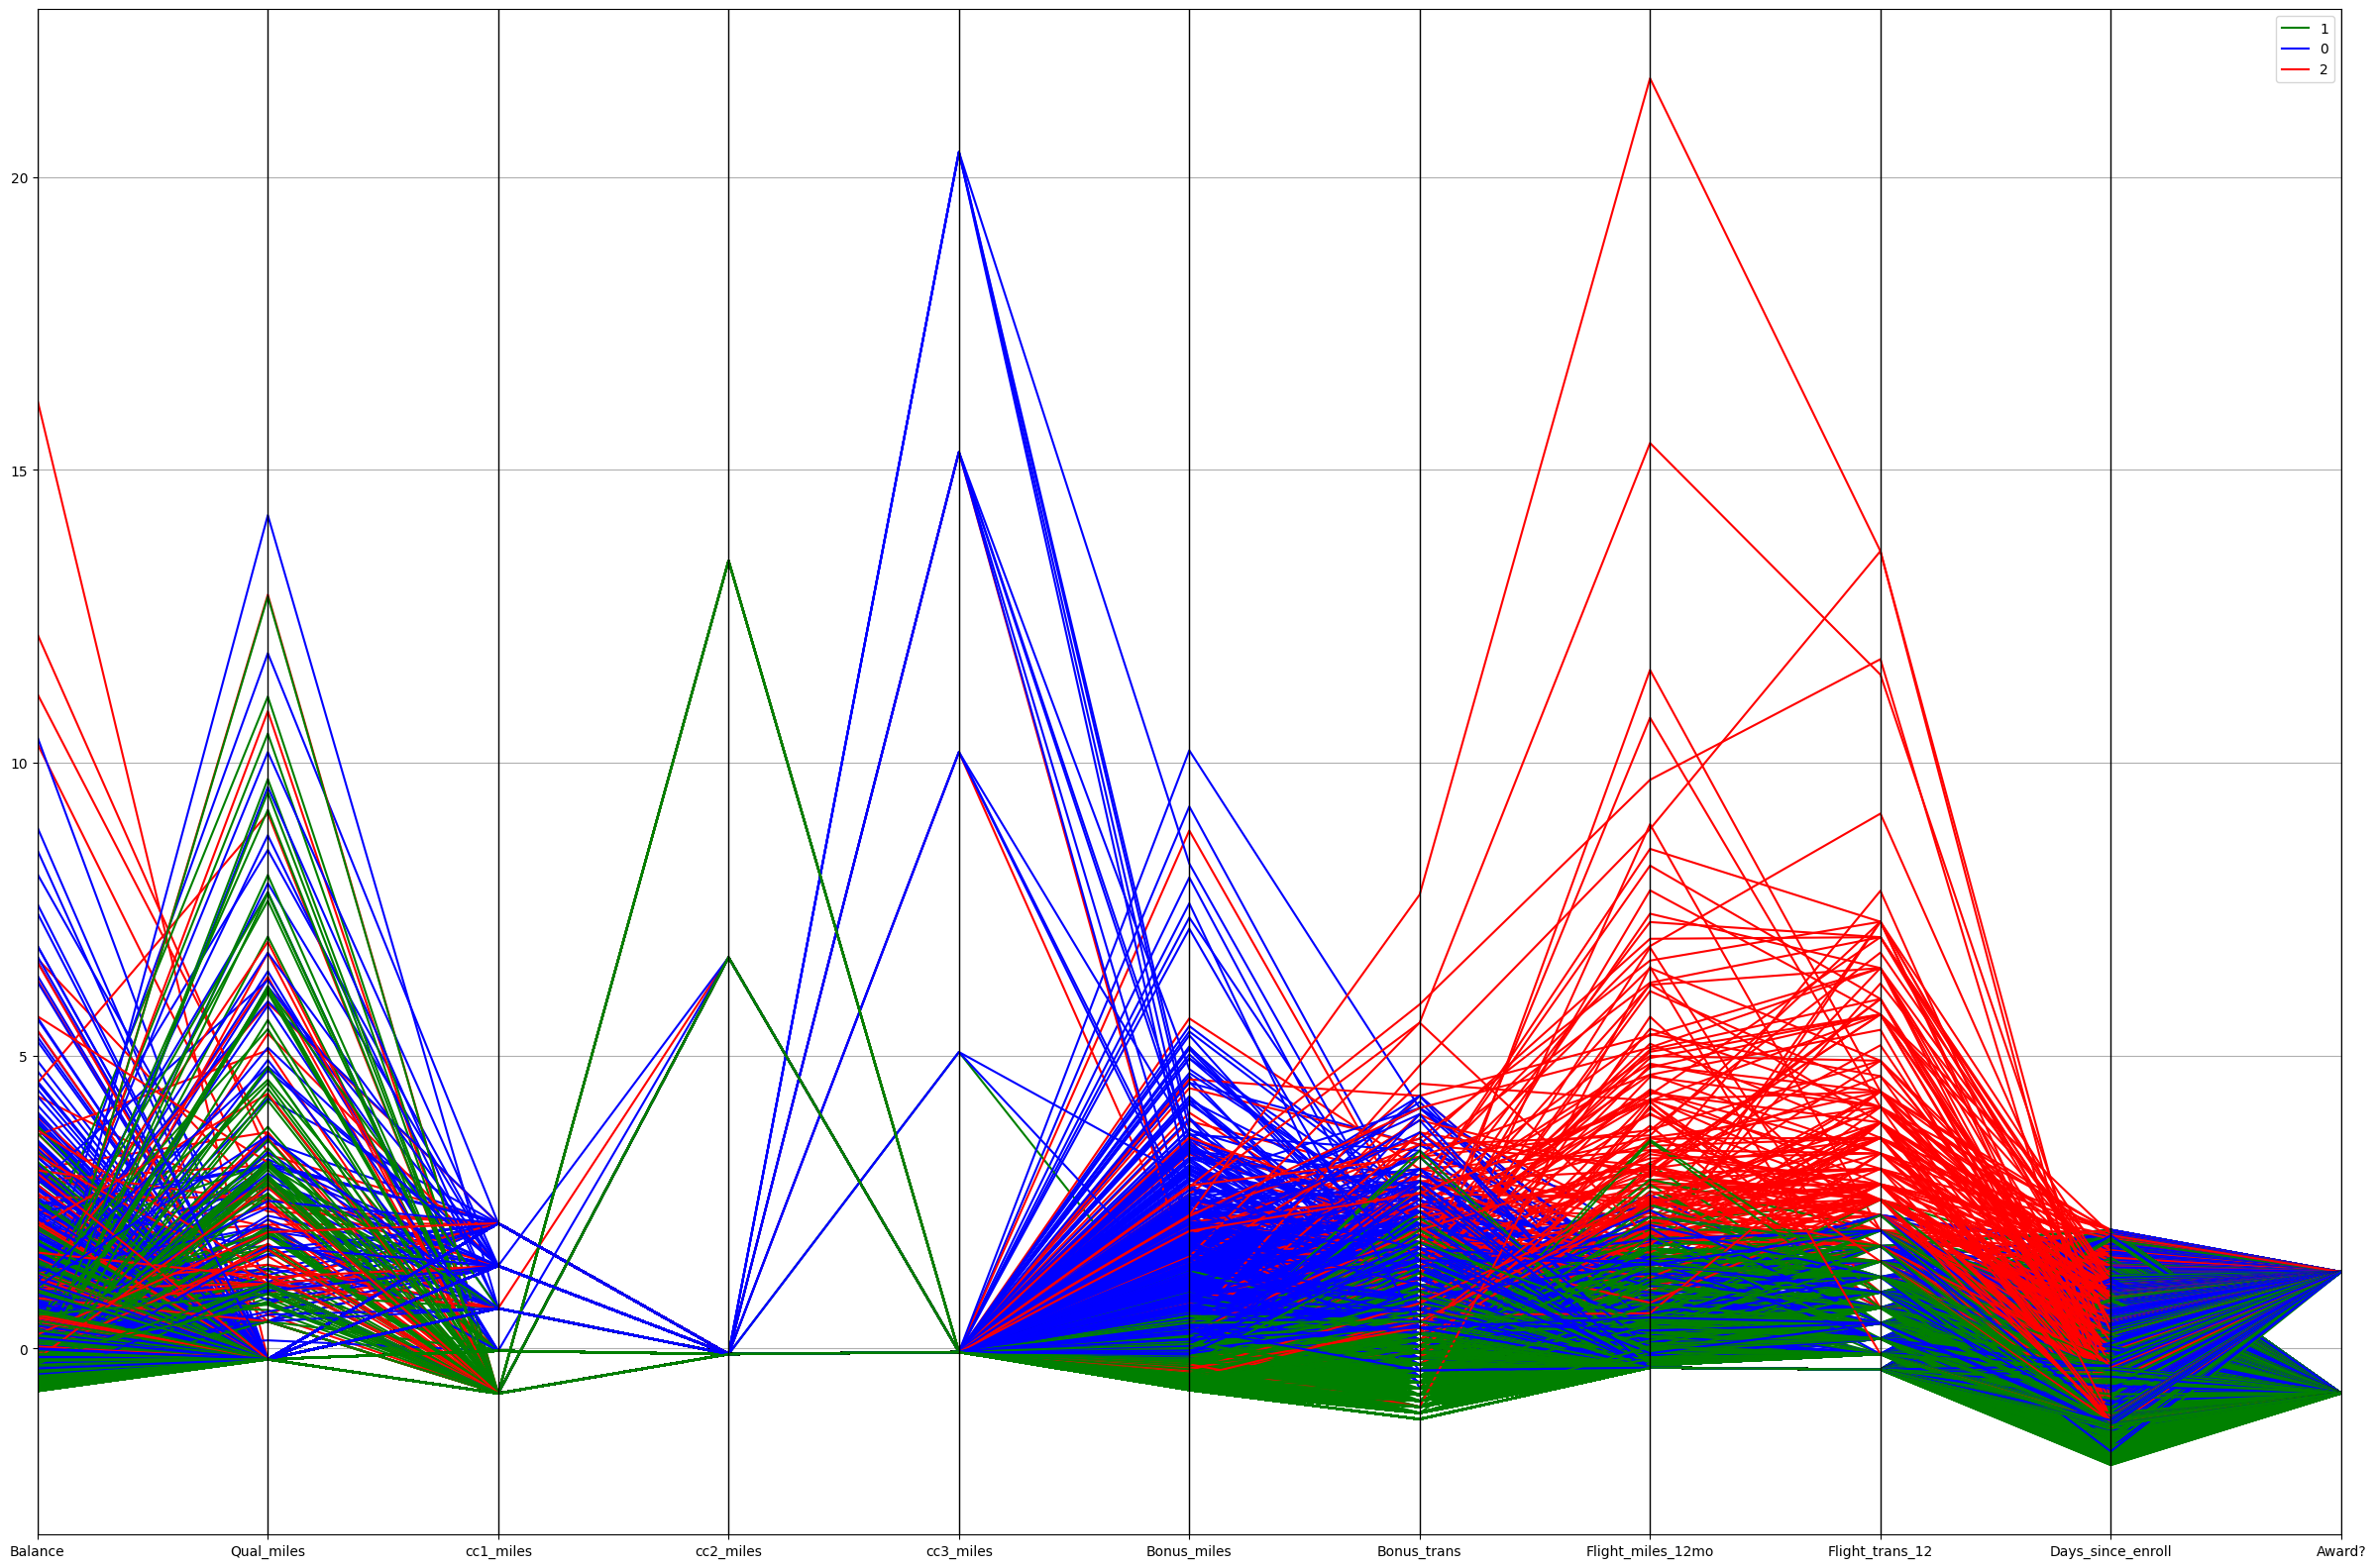

In [89]:
plt.figure(figsize=(30,20))
colors = ["red","blue","green"]
pd.plotting.parallel_coordinates(df_norm,class_column="cluster",color=colors,sort_labels=True)
plt.show()


### We see that our first cluster has a high ranking in Fligh_miles_12mo and Flight_trans_12, our second cluster has a higher ranking in cc2_miles and is low in Bonus_trans and Days_since_enroll, and our third cluster is very high in cc3_miles and is the highest in Qual_miles as well, although group one two is alos high in that category. We can make another plot to help us notice the centroids, which should give us more information. 

<AxesSubplot: >

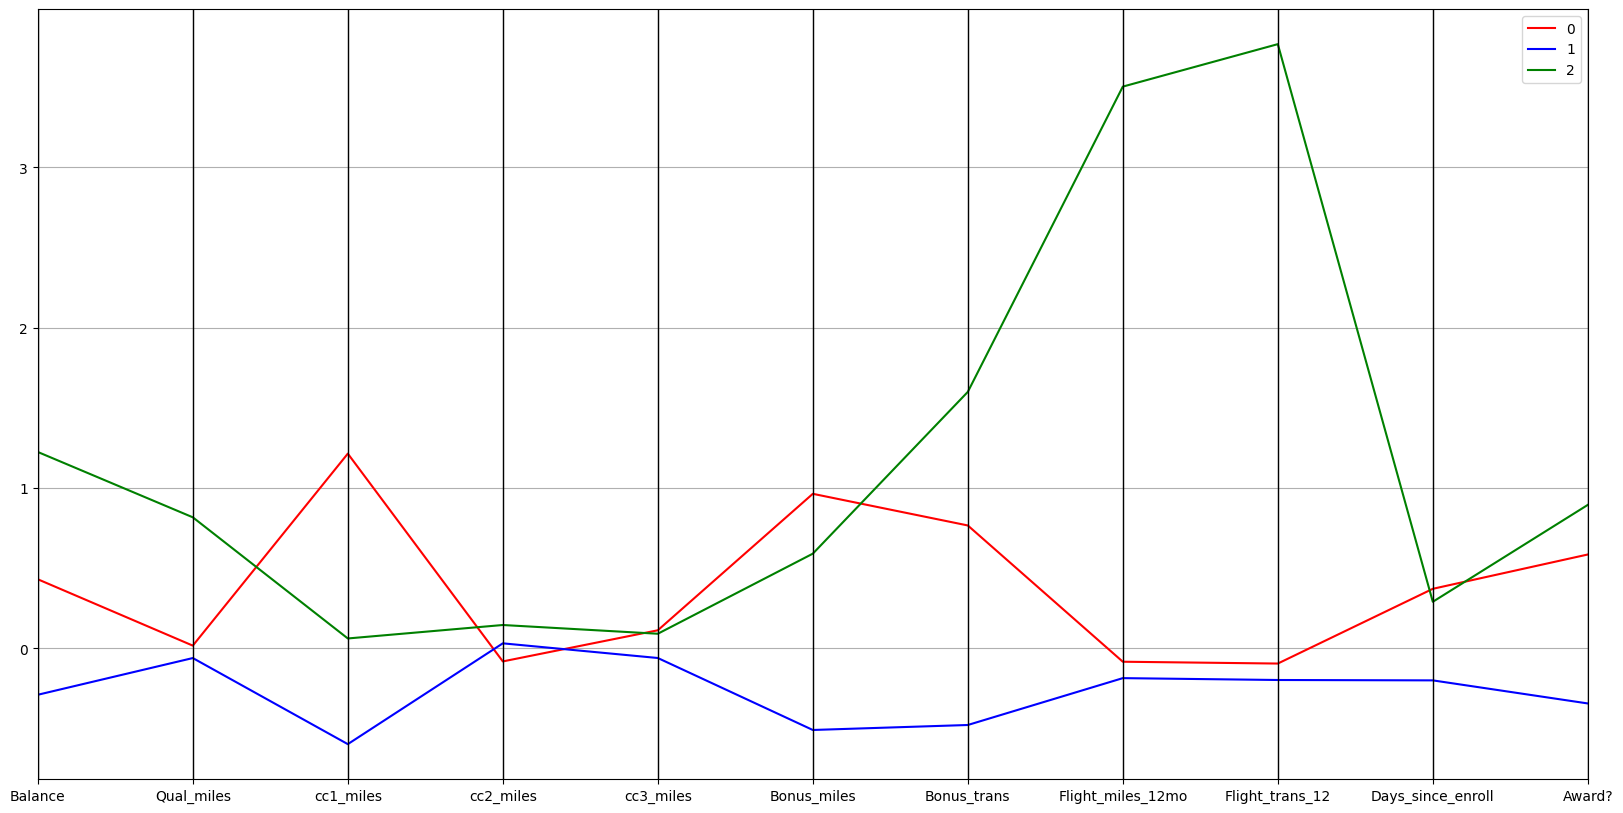

In [90]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=df.columns)
centroids["cluster"] = centroids.index

plt.figure(figsize=(20,10))
pd.plotting.parallel_coordinates(centroids,class_column="cluster",color=colors)

### We can see that our third group is primarily the high balance, high mileage group and our second group is the low balance, low mileage group. Our second group falls somewhere in the middle, with more cc1 miles than the other groups. This could lead us to assign the groups the names of newest, next newest, and oldest, but we see that is not necessarily the case based on the days since enrollment period. There we see that our second group is in fact the group that has been enrolled the longest by a slight margin over group three; our first group does still fit this assumption. Based on the plots above, a better way to assign the groups names might be the following:
### Group 1: High CC1 miles / Longest enrolled
### Group 2: Most recently enrolled / Least flier miles 
### Group 3: Most flight miles / Highest balance

### Recognizing which group is which is important for the Airlines industry as it gives them access to liquidity through loans on their loyalty programs and future profitability, which means we don't want to miss-classify someone as belonging to the high balance group when, in fact, they are actually a non-user overall with a low balance. We will rename the cluster data as high balance and group the three classes into two- high balance or non high balance. 
### With these groups now assigned to each record in the dataset, we can proceed to model building, validating, and testing. 

## Question 2:
### Split the data into training, validation, and test partitions and fit a model of your choice to predict each customer's segment. Report the model and the predictions.


In [91]:
from fast_ml.model_development import train_valid_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.metrics import accuracy_score

x_train,y_train,x_valid,y_valid,x_test,y_test = train_valid_test_split(df_norm,target="cluster",train_size=0.5,valid_size=0.3,test_size=0.2)
neighbors = KNN(n_neighbors=5)
neighbors.fit(x_train,y_train)
knn_pred_valid_y = neighbors.predict(x_valid)
knn_valid_accuracy = accuracy_score(y_valid,knn_pred_valid_y)
print("The accuracy of the validation prediction is ",knn_valid_accuracy)


The accuracy of the validation prediction is  0.9683333333333334


### The first model I wanted to attempt with this dataset was the KNearestNeighbors algorithm. Running this model gives us an accuracy score of 96.92% for the validation holdout data and the accuracy score is 96.75% for the test holdout data. This model gives us a decent bit of confidence in our predicted values, but we will test a few other models as well utilizing all the data. 

### We can attempt a neural network for our data due to its ability to give weights to different variables based on the hidden nodes within the hidden layer. We will use the rule of the hidden layer should have no more than 2/3 the nodes of the input layer plus the output layer, which gives us approximately nine hidden nodes. 

In [92]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(9),activation="logistic",solver="adam",alpha = 1)
classifier.fit(x_train,y_train)
nn_pred_valid_y = classifier.predict(x_valid)
nn_valid_acc = accuracy_score(y_valid, nn_pred_valid_y)
print("The accuracy of the prediction validation is ",nn_valid_acc)



The accuracy of the prediction validation is  0.9716666666666667


### Utilizing the neural net has given us an accuracy of 98.125% on our test dataset, which is stronger than our K nearest neighbors algorithm. This might not necessarily mean we will choose to utilize the neural network over the K nearest neighbors necessarily. We still want to plot our reuslts in confusion matrix, a receiver operating characteristic (ROC) curve, a cumulative gains chart, and a lift chart. We will especially pay attention to our confusion matrix as this gives us an idea of the false positives and false negatives, as well as the proportion classified correctly. 

<AxesSubplot: title={'center': 'Confusion Matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

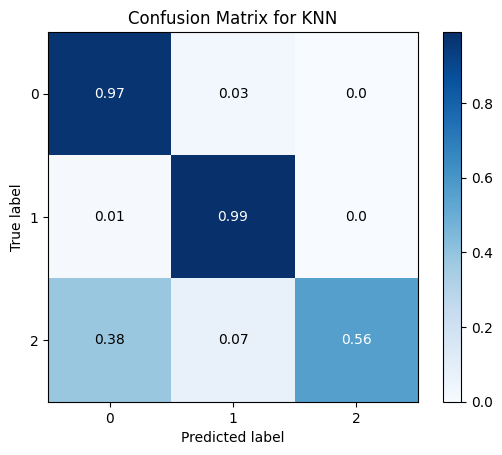

In [93]:
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_valid,knn_pred_valid_y,normalize = True,title="Confusion Matrix for KNN")

<AxesSubplot: title={'center': 'Confusion Matrix for NN'}, xlabel='Predicted label', ylabel='True label'>

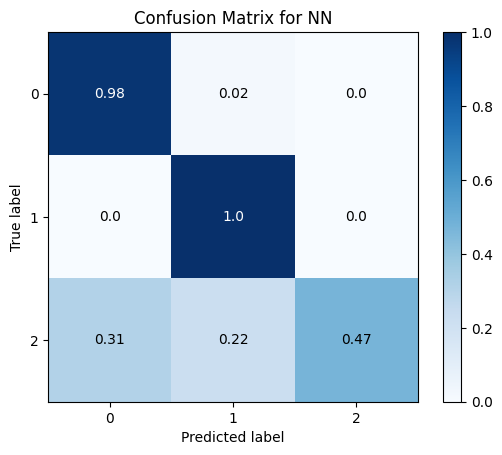

In [94]:
skplt.plot_confusion_matrix(y_valid,nn_pred_valid_y,normalize=True,title = "Confusion Matrix for NN")

### Although the Neural Network was able to classify our data with a higher degree of accuracy than the K nearest neighbors, from a quick observation of the confusion matrix for both the KNN and NN models show us that our KNN model contains less erroneous classifications in our class of interest than the neural net. In the neural net model, we see a 41% rate of our interest class classified as belonging to the second class, predicting only 51% of cases correctly for the high balance fliers. Our KNN model does better, only misclassifying 39% of the fliers. 

### Stepping back from our analysis, we can attempt to improve our model by diminishing the cases to just two classes: high balance fliers and low balance fliers. Let's do this before returning to our confusion matrices to see if this increases our odds of correctly classifying our class two members. 

In [95]:
df_norm["High balance"] = df_norm["cluster"].replace([0,1,2],[0,0,1])
df_norm = df_norm.drop("cluster",axis=1)
print(df_norm["High balance"].value_counts())

0    3832
1     167
Name: High balance, dtype: int64
      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1   -0.451084   -0.186275  -0.769482   -0.09823  -0.062759    -0.702698   
2   -0.539389   -0.186275  -0.769482   -0.09823  -0.062759    -0.701001   
3   -0.319991   -0.186275  -0.769482   -0.09823  -0.062759    -0.539185   
4   -0.583726   -0.186275  -0.769482   -0.09823  -0.062759    -0.689200   
5    0.239648   -0.186275   1.409295   -0.09823  -0.062759     1.082986   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1      -1.103926          -0.328562        -0.362123           1.395280   
2      -0.999801          -0.328562        -0.362123           1.379784   
3      -0.791550          -0.328562        -0.362123           1.411744   
4      -1.103926          -0.328562        -0.

### We have taken our three groups and consolidated them down into two groups- High balance fliers and non-high balanace fliers. We should now be able to construct a cumulative gains, ROC curve, and Lift curve for our data to help distinguish between KNN and neural net models. 

### Before we can look at our charts, we will need to refit the models to our new data with "High balance" as the new response variable. 

In [96]:
x_train,y_train,x_valid,y_valid,x_test,y_test = train_valid_test_split(df_norm,target="High balance",train_size=0.6,valid_size=0.3,test_size=0.1)

# fit the knn and predict- print the accuracy
neighbors = KNN(n_neighbors=5)
neighbors.fit(x_train,y_train)
knn_pred_valid_y = neighbors.predict(x_valid)
knn_valid_accuracy = accuracy_score(y_valid,knn_pred_valid_y)
print("New KNN valid accuracy score- ",knn_valid_accuracy)

# fit the nn and predict - print the accuracy
classifier = MLPClassifier(hidden_layer_sizes=(9),activation="logistic",solver="adam",alpha = 1)
classifier.fit(x_train,y_train)
nn_pred_valid_y = classifier.predict(x_valid)
nn_valid_acc = accuracy_score(y_valid,nn_pred_valid_y)
print("New NN accuracy score- ",nn_valid_acc)

New KNN valid accuracy score-  0.9916666666666667
New NN accuracy score-  0.9816666666666667


### We do see an increase in the accuracy score for the KNN model with this new response variable "High balance". Before we conclude this is the model we will use, we will first look at the difference cureves and scoring methods to confirm whether this holds true in fact. 

<AxesSubplot: title={'center': 'NN confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

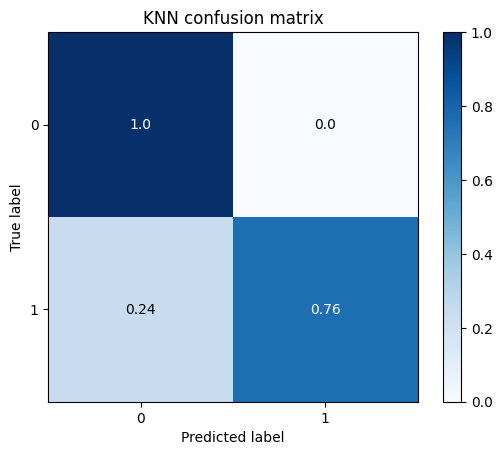

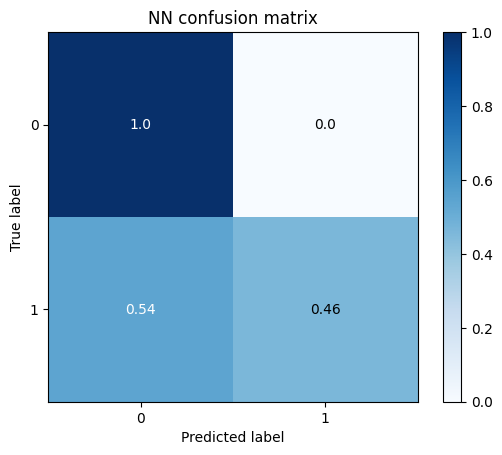

In [97]:
skplt.plot_confusion_matrix(y_valid,knn_pred_valid_y,normalize=True,title="KNN confusion matrix")
skplt.plot_confusion_matrix(y_valid,nn_pred_valid_y,normalize=True,title="NN confusion matrix")

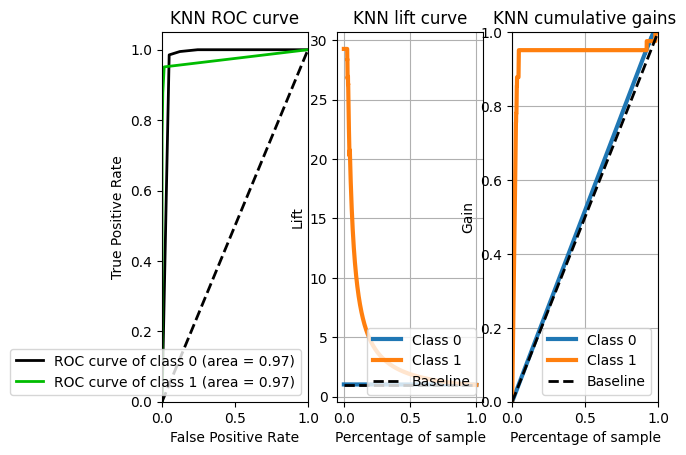

In [98]:
knn_y_proba = neighbors.predict_proba(x_valid)
fig,ax = plt.subplots(1,3)
skplt.plot_roc(y_valid,knn_y_proba,title="KNN ROC curve",ax=ax[0],plot_macro=False,plot_micro=False)
skplt.plot_lift_curve(y_valid,knn_y_proba,title="KNN lift curve",ax=ax[1])
skplt.plot_cumulative_gain(y_valid,knn_y_proba,title="KNN cumulative gains",ax=ax[2])
plt.show()


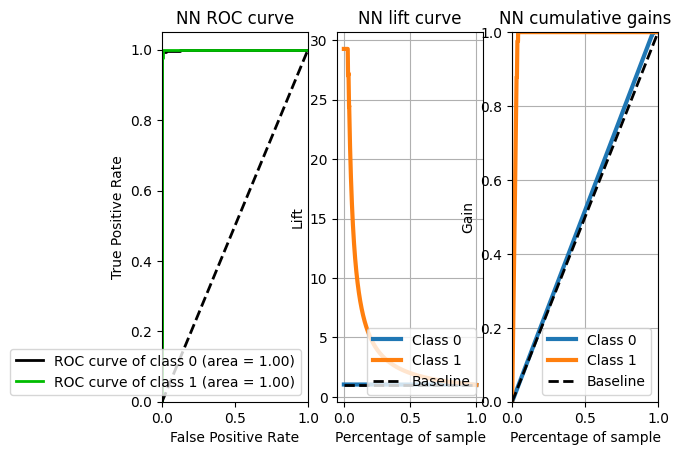

In [99]:
nn_y_proba = classifier.predict_proba(x_valid)
fig,ax = plt.subplots(1,3)
skplt.plot_roc(y_valid,nn_y_proba,title="NN ROC curve",ax=ax[0],plot_macro=False,plot_micro=False)
skplt.plot_lift_curve(y_valid,nn_y_proba,title="NN lift curve",ax=ax[1])
skplt.plot_cumulative_gain(y_valid,nn_y_proba,title="NN cumulative gains",ax=ax[2])
plt.show()

### Upon reveiwing this information, we are left with the conclusion our model, in both instances, prefers the outcome of the KNN model far and above. When we reduce the response variable to only two classes, our neural net completely misclassifies every record of our high balance class as someone from a low balance class. This is obviously extraordinarily unhelpful for our airlines. 

### We will utilize the KNN model to proceed with future classifications for our passengers, as our accuracy is ~98% strong with a ~77% correct rate for classifying the high balance class correctly. We will now run our data one final time with our test data and see how our KNN model does. 

Accuracy score for the test data is-  0.995


<AxesSubplot: title={'center': 'KNN test data confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

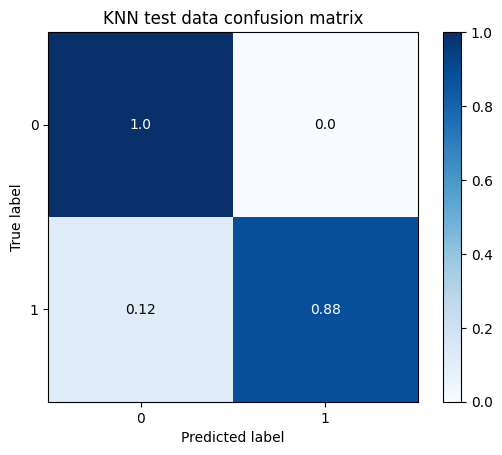

In [100]:
y_pred_test = neighbors.predict(x_test)
y_test_acc = accuracy_score(y_test,y_pred_test)
print("Accuracy score for the test data is- ",y_test_acc)
skplt.plot_confusion_matrix(y_test,y_pred_test,normalize=True,title="KNN test data confusion matrix")